In [39]:
import pandas as pd
import Helper
import numpy as np

data = pd.read_csv('Data/PvsUdata/MergedData1.csv')

In [66]:
data.columns

Index(['trial', 'sample', 'revenue_P', 'revenue_U', 'revenue_diff_U-P',
       'Price/Yield_P', 'Price/Yield_U', 'fcst_mean_P', 'fcst_mean_U',
       'Forecast Error_P', 'Forecast Error_U', 'Forecast Error Positive_P',
       'Forecast Error Positive_U', 'Forecast Error Negative_P',
       'Forecast Error Negative_U', 'pooled_fcst_std_dev_P',
       'pooled_fcst_std_dev_U', 'BkgWndw1_Pos_P', 'BkgWndw1_Pos_U',
       'BkgWndw1_Neg_P', 'BkgWndw1_Neg_U', 'BkgWndw2_Pos_P', 'BkgWndw2_Pos_U',
       'BkgWndw2_Neg_P', 'BkgWndw2_Neg_U', 'BkgWndw3_Pos_P', 'BkgWndw3_Pos_U',
       'BkgWndw3_Neg_P', 'BkgWndw3_Neg_U', 'BkgClsY0Y3_Pos_P',
       'BkgClsY0Y3_Pos_U', 'BkgClsY0Y3_Neg_P', 'BkgClsY0Y3_Neg_U',
       'BkgClsY4Y6_Pos_P', 'BkgClsY4Y6_Pos_U', 'BkgClsY4Y6_Neg_P',
       'BkgClsY4Y6_Neg_U', 'BkgClsY7Y9_Pos_P', 'BkgClsY7Y9_Pos_U',
       'BkgClsY7Y9_Neg_P', 'BkgClsY7Y9_Neg_U'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['trial', 'sample', 'revenue_P', 'revenue_U', 'revenue_diff_U-P'])  # Features
Y = (data['revenue_U'] > data['revenue_P']).astype(int)  # Target: 1 if UEEE wins, 0 if PEEE wins

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

77.66666666666667 22.333333333333332
Data less than -2 std dev:  18
Data between -2 and -1 std dev:  73
Data between -1 and mean:  201
Data between mean and +1 std dev:  220
Data between +1 and +2 std dev:  71
Data greater than +2 std dev:  17


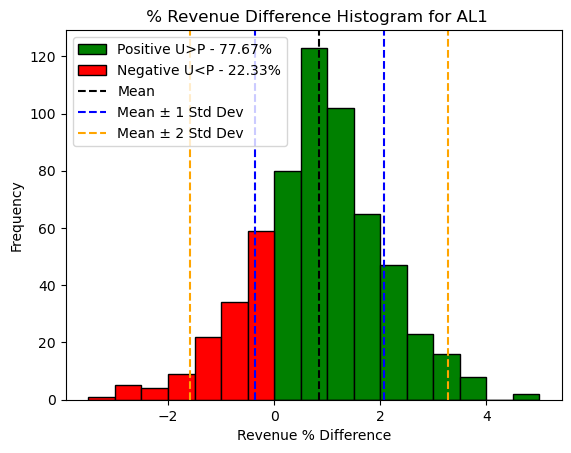

In [42]:
Helper.win_loss_histogram((data['revenue_diff_U-P']*100/data['revenue_P']),carrier='AL1',num_bins=15, strategy1='U', strategy2='P')

In [43]:
# Check for missing values, outliers, and basic summary statistics
print(X_train.describe())  # Summary statistics
print(X_train.isnull().sum())  # Missing value check

       Price/Yield_P  Price/Yield_U   fcst_mean_P   fcst_mean_U  \
count     480.000000     480.000000    480.000000    480.000000   
mean        0.578131       0.580498  10863.099780  10956.093119   
std         0.017986       0.016584    860.232800    768.821299   
min         0.532934       0.542897   7983.628697   8241.835966   
25%         0.564491       0.569403  10294.926867  10449.591399   
50%         0.578577       0.580369  10896.287467  10988.870578   
75%         0.591568       0.592446  11510.424790  11535.000332   
max         0.630862       0.629774  12762.609623  12687.143657   

       Forecast Error_P  Forecast Error_U  Forecast Error Positive_P  \
count        480.000000        480.000000                 480.000000   
mean         645.006030        675.430619                1138.826827   
std         1424.889480       1365.534610                 951.738792   
min        -3386.109787      -3196.988678                   5.804468   
25%         -352.886953       -354.9

In [74]:
# scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

In [75]:
X_trainScaled = pd.DataFrame(X_trainScaled, columns=X.columns)
X_testScaled = pd.DataFrame(X_testScaled, columns=X.columns)
X_trainScaled

,Price/Yield_P,Price/Yield_U,fcst_mean_P,fcst_mean_U,Forecast Error_P,Forecast Error_U,Forecast Error Positive_P,Forecast Error Positive_U,Forecast Error Negative_P,Forecast Error Negative_U,...,BkgClsY0Y3_Neg_P,BkgClsY0Y3_Neg_U,BkgClsY4Y6_Pos_P,BkgClsY4Y6_Pos_U,BkgClsY4Y6_Neg_P,BkgClsY4Y6_Neg_U,BkgClsY7Y9_Pos_P,BkgClsY7Y9_Pos_U,BkgClsY7Y9_Neg_P,BkgClsY7Y9_Neg_U
0,1.048480,1.108078,1.282439,1.095867,1.162101,1.020672,1.279916,1.050758,0.738830,0.766909,...,0.601429,0.638860,1.491546,1.361511,0.746939,0.740827,1.186888,1.042988,0.745124,0.783124
1,2.007863,1.452545,1.456918,1.711201,1.301862,1.459484,1.432772,1.678644,0.829410,0.801114,...,0.858259,0.734518,1.356484,1.925674,0.839243,0.798185,1.233045,1.599682,0.745124,0.765390
2,2.934805,2.974390,1.441354,1.179069,1.620553,1.409130,1.916187,1.593122,0.819306,0.819791,...,0.824601,0.774651,2.414966,1.847703,0.836273,0.775120,1.485590,1.353414,0.745124,0.783124
3,-1.044774,-1.606672,-0.493237,-0.708771,-0.707994,-0.834014,-0.818311,-0.909853,-0.388209,-0.540668,...,0.286618,0.161120,-0.938024,-0.830838,-0.665528,-0.085301,-0.910977,-1.049924,-0.598433,-1.108895
4,-0.103330,0.348526,-0.217319,-0.194857,-0.196470,-0.190594,-0.376375,-0.382125,0.132099,0.168696,...,0.084370,0.213873,0.141311,0.077967,0.490228,0.463109,-0.681995,-0.534314,0.023355,0.016641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-2.152390,-1.902560,-0.796910,-0.819165,-0.638413,-0.654985,-0.779705,-0.808080,-0.282880,-0.267685,...,-0.288751,-0.189376,-0.997421,-0.861381,-0.223303,-0.335324,-0.700304,-0.714334,-0.277527,-0.267817
476,-0.055910,-0.330066,-0.429591,-0.486467,-0.491828,-0.522651,-0.775639,-0.790909,0.063137,0.031501,...,-0.099486,-0.248165,-0.946953,-1.062562,0.012628,-0.311140,-0.594338,-0.648176,0.156175,0.334191
477,1.302258,1.260356,0.824782,1.017597,0.849273,1.044048,0.864187,1.121532,0.654298,0.706109,...,0.464475,0.520252,0.479202,0.764175,0.564083,0.683299,1.154238,1.416103,0.726926,0.765071
478,-1.903060,-1.486668,-1.707676,-1.350880,-1.583791,-1.453577,-1.141022,-1.149343,-1.976147,-1.674475,...,-2.531264,-1.816077,-1.133946,-1.189149,-1.567754,-2.061930,-1.019744,-1.042087,-1.680291,-1.274946


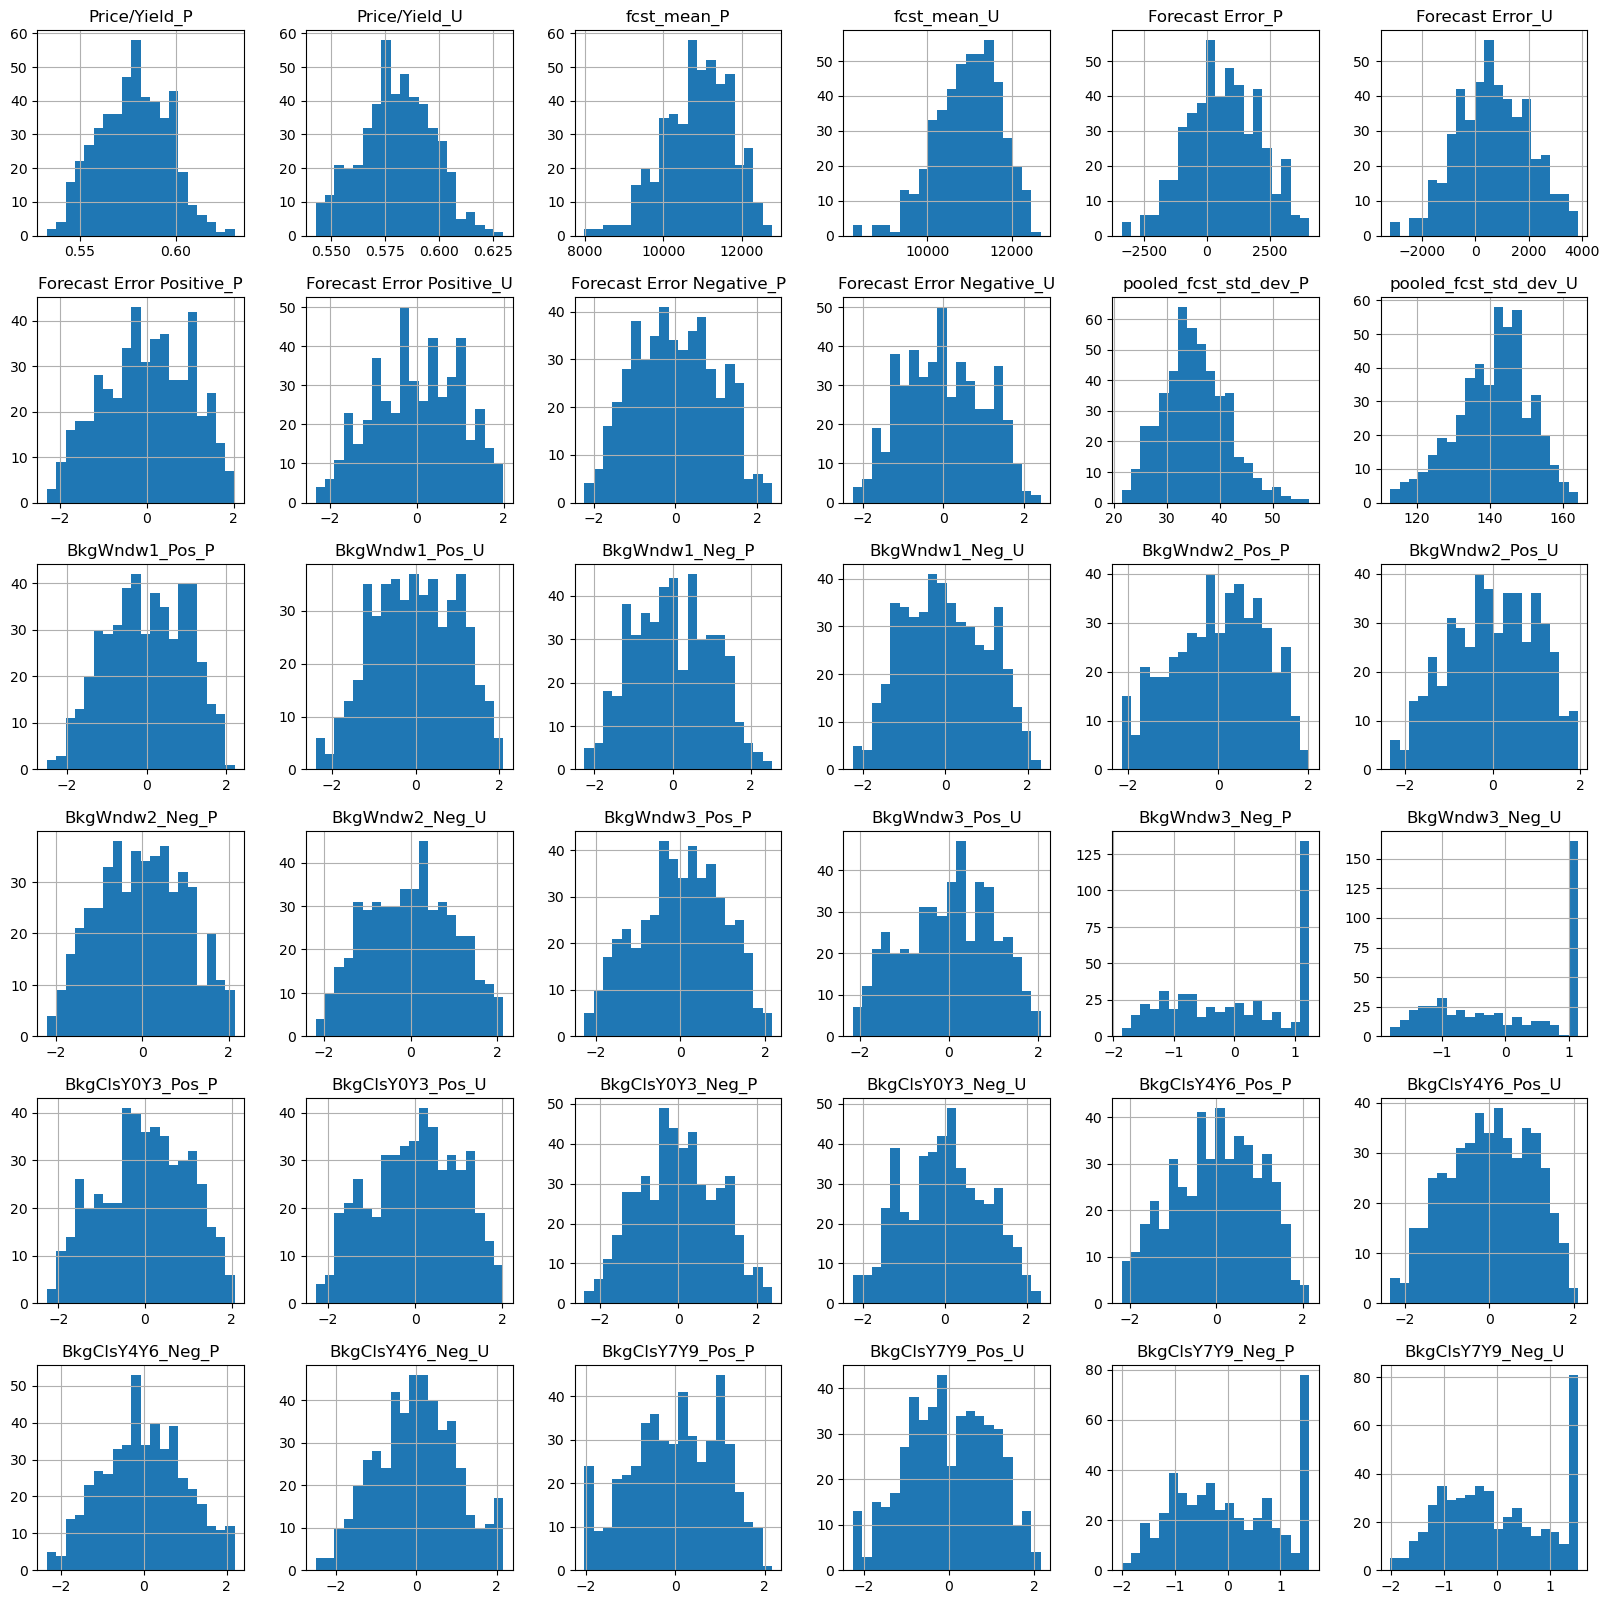

In [46]:
import matplotlib.pyplot as plt
X_train.hist(bins=20, figsize=(20, 20))
plt.show()

In [45]:
# transform certain features based on their distribution to match gaussian distribution
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer()

# the features to transform are the ones if they have Pos or Neg in the name
features_to_transform = [col for col in X_train.columns if 'Pos' in col or 'Neg' in col]

# Apply the transformation
X_train[features_to_transform] = pt.fit_transform(X_train[features_to_transform])
X_test[features_to_transform] = pt.transform(X_test[features_to_transform])



In [47]:
# correlation values for all features with respect to the target (Y)
correlation = X_train.corrwith(Y_train)
correlation = correlation.sort_values(ascending=False)
correlation

pooled_fcst_std_dev_P       -0.144605
Price/Yield_U               -0.210320
Price/Yield_P               -0.227082
BkgClsY4Y6_Neg_P            -0.295172
BkgWndw3_Pos_P              -0.302895
pooled_fcst_std_dev_U       -0.313338
BkgClsY0Y3_Pos_P            -0.326103
BkgClsY4Y6_Pos_P            -0.326206
BkgWndw3_Neg_P              -0.331027
fcst_mean_P                 -0.331406
BkgWndw2_Pos_P              -0.339046
BkgClsY7Y9_Pos_P            -0.341675
Forecast Error_P            -0.343372
BkgClsY0Y3_Neg_P            -0.345628
BkgWndw1_Pos_P              -0.346702
Forecast Error Positive_P   -0.347814
BkgWndw1_Neg_P              -0.352821
BkgWndw2_Neg_P              -0.357765
Forecast Error Negative_P   -0.359736
BkgWndw3_Neg_U              -0.381476
BkgClsY7Y9_Neg_U            -0.386520
BkgClsY4Y6_Neg_U            -0.389209
BkgClsY7Y9_Neg_P            -0.390353
BkgClsY7Y9_Pos_U            -0.392448
BkgWndw1_Pos_U              -0.398624
fcst_mean_U                 -0.407407
BkgWndw1_Neg

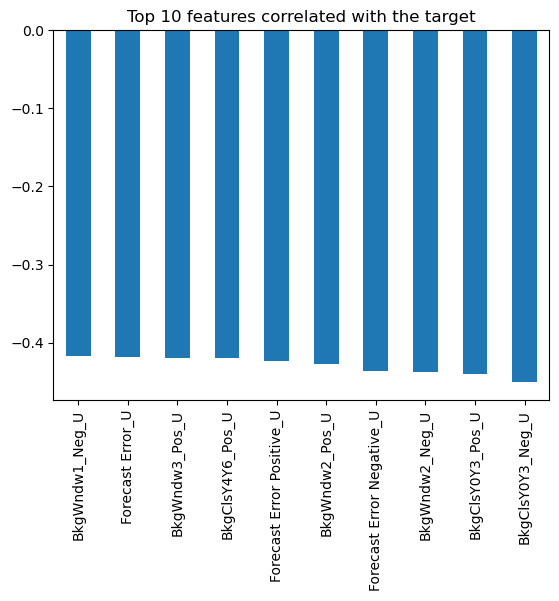

In [70]:
# show the top 10 features that are most correlated with the target in magnitude
correlation.tail(10).plot(kind='bar', title='Top 10 features correlated with the target')
plt.show()

In [79]:
# Create new features by combining existing ones
X_trainScaled['Price_Yield_Ratio'] = X_trainScaled['Price/Yield_P'] / X_trainScaled['Price/Yield_U']
X_trainScaled['Forecast_Error_Diff'] = X_trainScaled['Forecast Error_P'] - X_trainScaled['Forecast Error_U']
X_trainScaled['BkgWndw1_Pos_Ratio'] = X_trainScaled['BkgWndw1_Pos_P'] / X_trainScaled['BkgWndw1_Pos_U']
X_trainScaled['BkgClsY0Y3_Pos_Ratio'] = X_trainScaled['BkgClsY0Y3_Pos_P'] / X_trainScaled['BkgClsY0Y3_Pos_U']

# Apply the same transformations to the test set
X_testScaled['Price_Yield_Ratio'] = X_testScaled['Price/Yield_P'] / X_testScaled['Price/Yield_U']
X_testScaled['Forecast_Error_Diff'] = X_testScaled['Forecast Error_P'] - X_testScaled['Forecast Error_U']
X_testScaled['BkgWndw1_Pos_Ratio'] = X_testScaled['BkgWndw1_Pos_P'] / X_testScaled['BkgWndw1_Pos_U']
X_testScaled['BkgClsY0Y3_Pos_Ratio'] = X_testScaled['BkgClsY0Y3_Pos_P'] / X_testScaled['BkgClsY0Y3_Pos_U']

# Recalculate the correlation values for the new features with respect to the target (Y)
new_correlation = X_trainScaled.corrwith(Y_train)
new_correlation = new_correlation.sort_values(ascending=False)
print(new_correlation)

BkgClsY4Y6_Pos_U             0.048527
Forecast_Error_Diff          0.034095
BkgClsY4Y6_Pos_P             0.033890
BkgClsY4Y6_Neg_U             0.030513
BkgWndw3_Pos_U               0.021078
BkgWndw3_Pos_P               0.020778
BkgWndw2_Pos_U               0.018610
Price/Yield_U                0.017546
BkgWndw2_Pos_P               0.014324
BkgClsY0Y3_Pos_P             0.011106
Forecast Error Positive_U    0.010698
Forecast Error Positive_P    0.009683
BkgClsY4Y6_Neg_P             0.006443
BkgClsY0Y3_Pos_Ratio         0.006146
BkgClsY0Y3_Pos_U             0.005057
BkgWndw1_Pos_P               0.003806
Forecast Error_P             0.003367
BkgWndw1_Pos_U               0.001522
fcst_mean_P                  0.001489
pooled_fcst_std_dev_U        0.001293
BkgClsY7Y9_Pos_P             0.000390
BkgClsY7Y9_Pos_U             0.000299
Forecast Error_U            -0.002601
BkgWndw3_Neg_U              -0.005054
fcst_mean_U                 -0.006098
BkgClsY0Y3_Neg_U            -0.006253
BkgWndw2_Neg

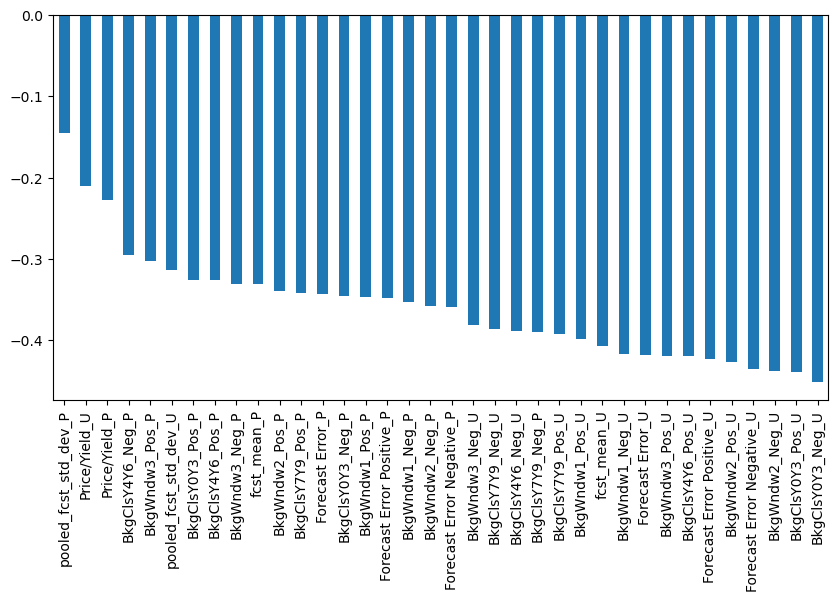

In [48]:
# plot the correlation values
plt.figure(figsize=(10, 5))
correlation.plot(kind='bar')
plt.show()

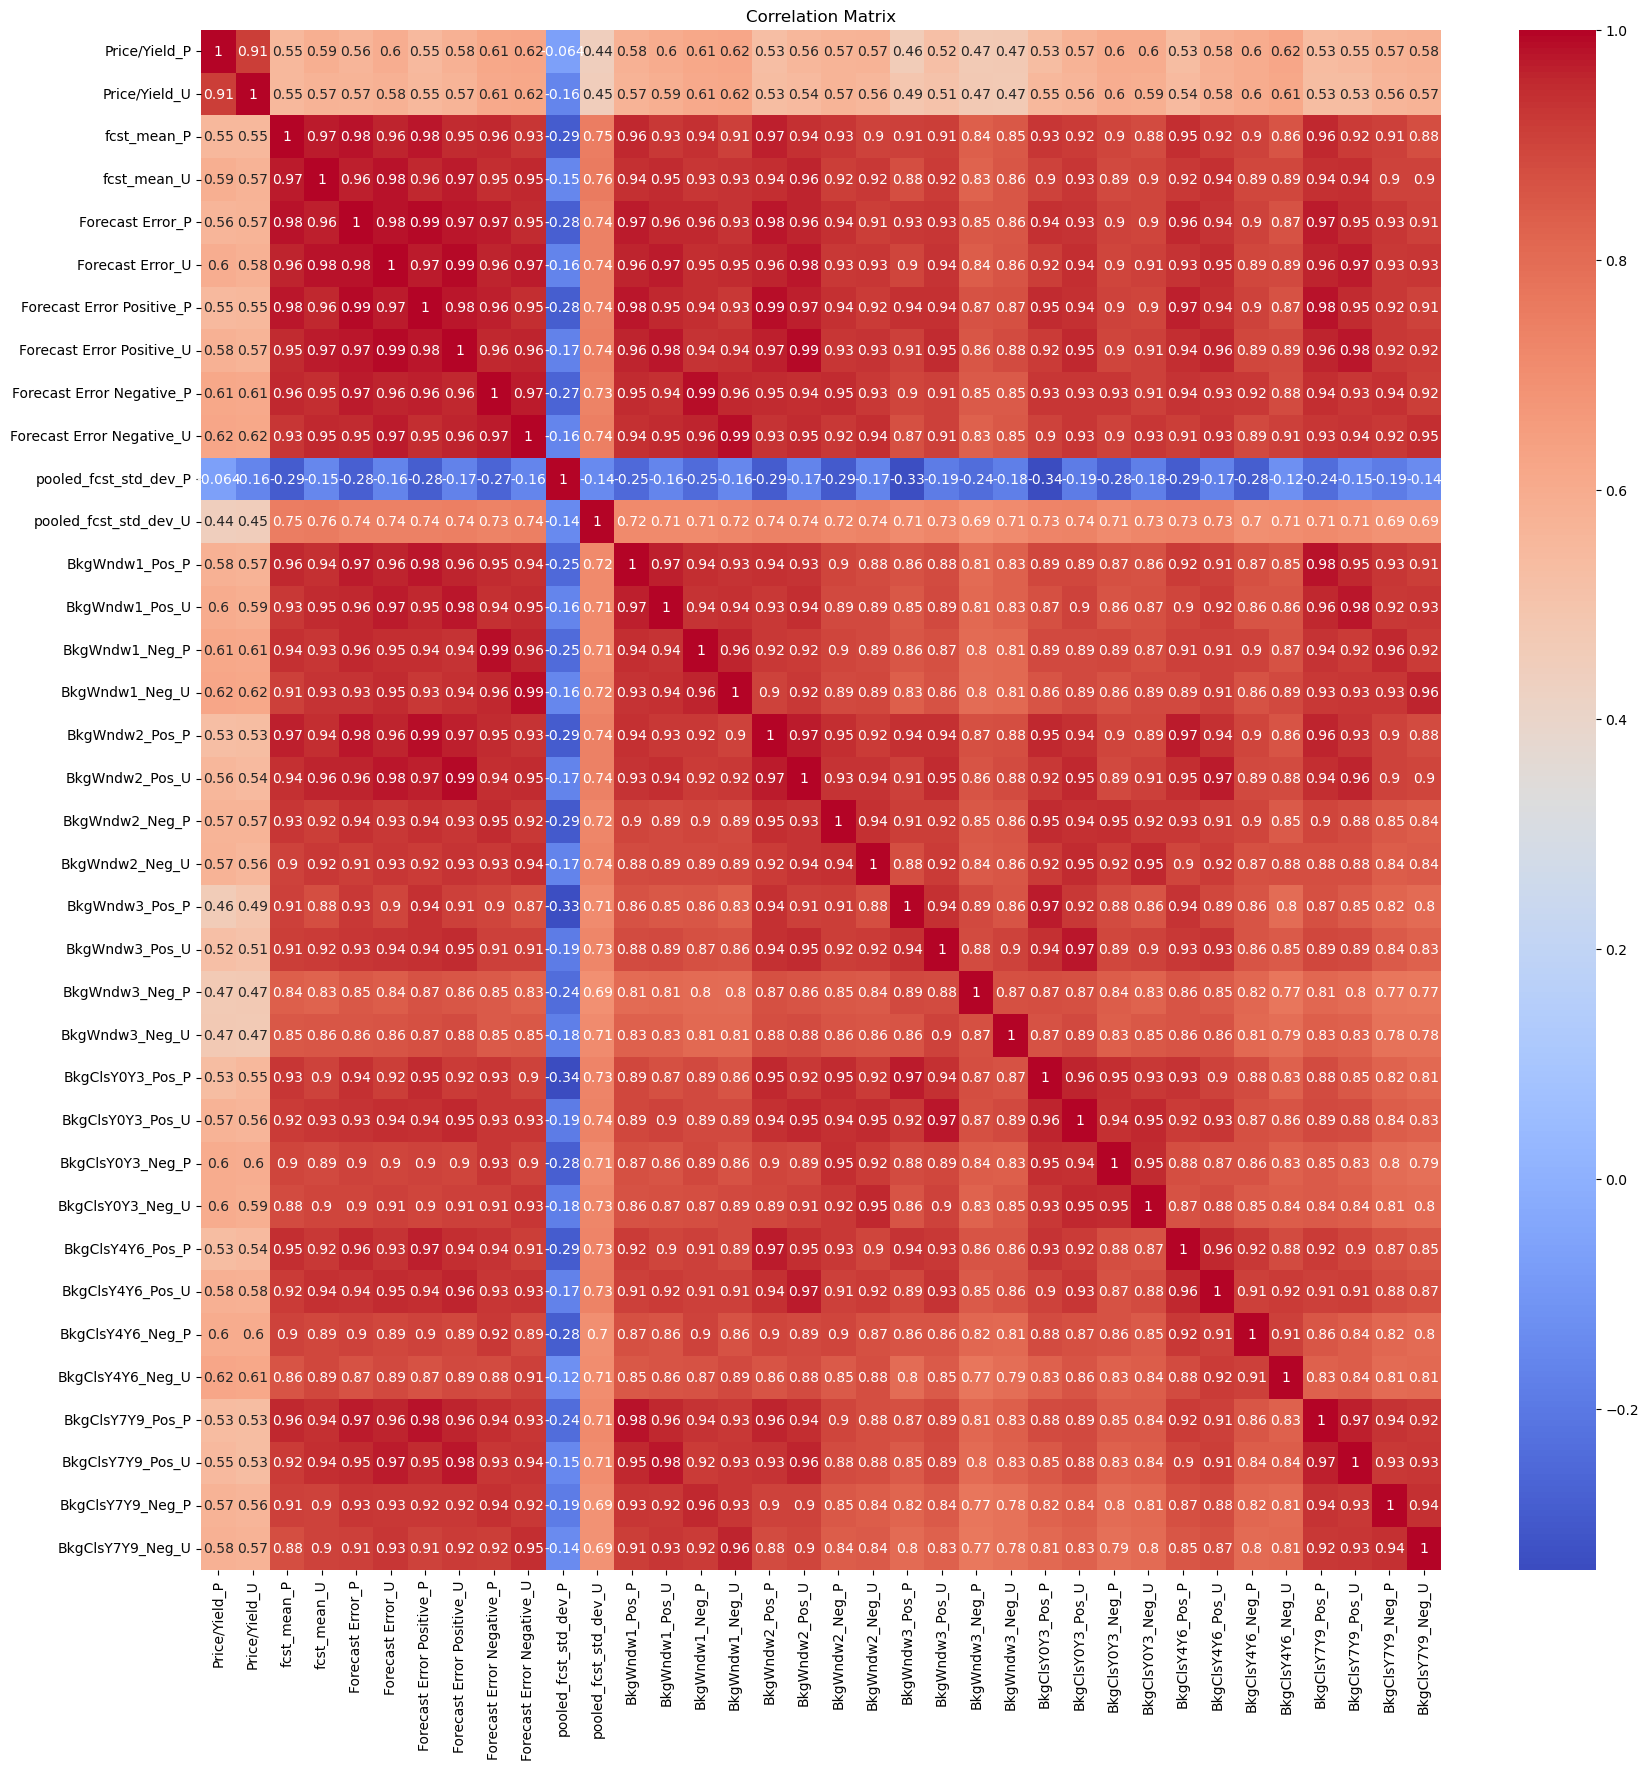

In [51]:
# correlation matrix heatmap
import seaborn as sns
corr_matrix = X_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

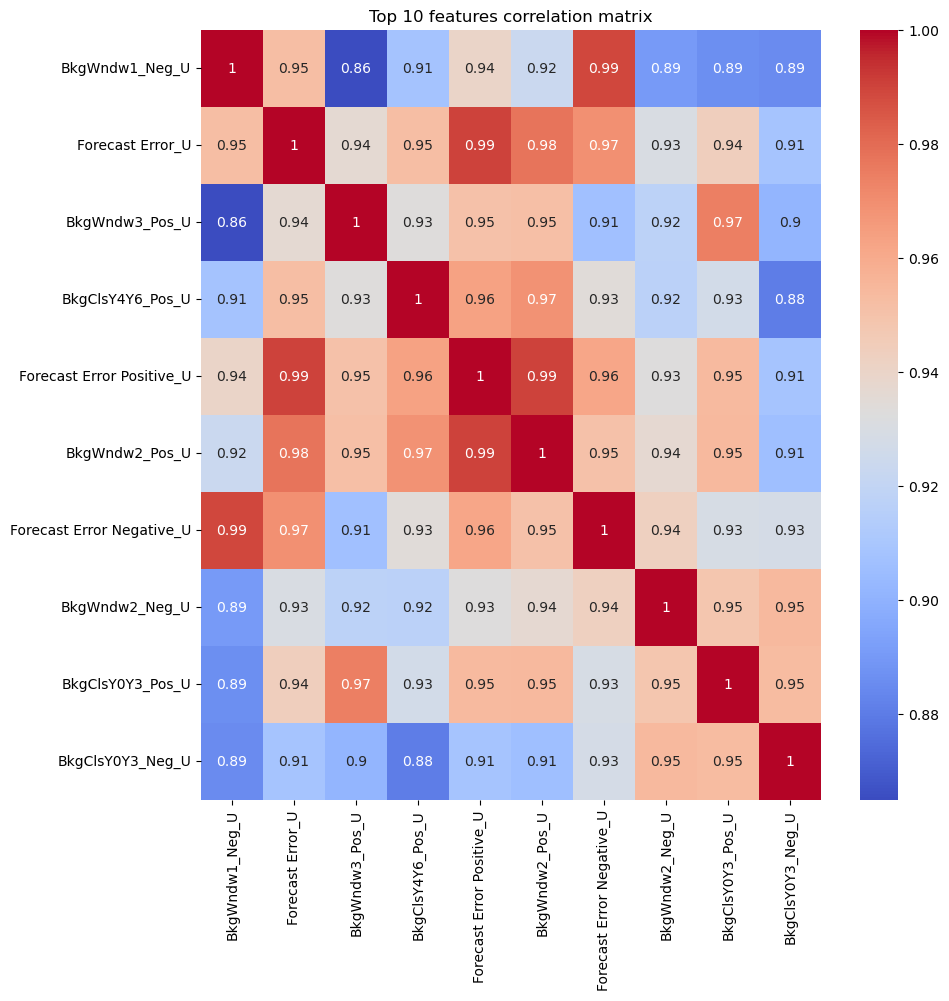

In [71]:
# heatmap of the top 10 features that are most correlated with the target
top_10_features = correlation.tail(10).index
top_10_features_corr = X_train[top_10_features].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(top_10_features_corr, annot=True, cmap='coolwarm')
plt.title('Top 10 features correlation matrix')
plt.show()

In [52]:
# show highly correlated feature pairs
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
strong_pairs = sorted_pairs[(sorted_pairs > 0.98) & (sorted_pairs < 1)]
for pair, value in strong_pairs.items():
    print(f"{pair}: {value}")

('Forecast Error_P', 'Forecast Error Positive_P'): 0.9909279343527454
('Forecast Error Positive_P', 'Forecast Error_P'): 0.9909279343527454
('BkgWndw2_Pos_U', 'Forecast Error Positive_U'): 0.9904810775664034
('Forecast Error Positive_U', 'BkgWndw2_Pos_U'): 0.9904810775664034
('Forecast Error Positive_U', 'Forecast Error_U'): 0.9902465895243058
('Forecast Error_U', 'Forecast Error Positive_U'): 0.9902465895243058
('BkgWndw1_Neg_P', 'Forecast Error Negative_P'): 0.9894657462632936
('Forecast Error Negative_P', 'BkgWndw1_Neg_P'): 0.9894657462632936
('Forecast Error Positive_P', 'BkgWndw2_Pos_P'): 0.9893054178501289
('BkgWndw2_Pos_P', 'Forecast Error Positive_P'): 0.9893054178501289
('BkgWndw1_Neg_U', 'Forecast Error Negative_U'): 0.9891153125629482
('Forecast Error Negative_U', 'BkgWndw1_Neg_U'): 0.9891153125629482
('Forecast Error_P', 'Forecast Error_U'): 0.9833239433057815
('Forecast Error_U', 'Forecast Error_P'): 0.9833239433057815
('fcst_mean_P', 'Forecast Error_P'): 0.98321810855155


KeyError: "None of [Index([('Forecast Error_P', 'Forecast Error Positive_P'),\n       ('Forecast Error Positive_P', 'Forecast Error_P'),\n         ('BkgWndw2_Pos_U', 'Forecast Error Positive_U'),\n         ('Forecast Error Positive_U', 'BkgWndw2_Pos_U'),\n       ('Forecast Error Positive_U', 'Forecast Error_U'),\n       ('Forecast Error_U', 'Forecast Error Positive_U'),\n         ('BkgWndw1_Neg_P', 'Forecast Error Negative_P'),\n         ('Forecast Error Negative_P', 'BkgWndw1_Neg_P'),\n         ('Forecast Error Positive_P', 'BkgWndw2_Pos_P'),\n         ('BkgWndw2_Pos_P', 'Forecast Error Positive_P'),\n         ('BkgWndw1_Neg_U', 'Forecast Error Negative_U'),\n         ('Forecast Error Negative_U', 'BkgWndw1_Neg_U'),\n                ('Forecast Error_P', 'Forecast Error_U'),\n                ('Forecast Error_U', 'Forecast Error_P'),\n                     ('fcst_mean_P', 'Forecast Error_P'),\n                     ('Forecast Error_P', 'fcst_mean_P'),\n                  ('BkgClsY7Y9_Pos_P', 'BkgWndw1_Pos_P'),\n                  ('BkgWndw1_Pos_P', 'BkgClsY7Y9_Pos_P'),\n                     ('fcst_mean_U', 'Forecast Error_U'),\n                     ('Forecast Error_U', 'fcst_mean_U')],\n      dtype='object')] are in the [columns]"

In [32]:
# Remove highly correlated features
for pair in strong_pairs.index:
    feature1, feature2 = pair
    if feature1 in X_train.columns and feature2 in X_train.columns:
        X_train.drop(columns=[feature2], inplace=True)
        X_test.drop(columns=[feature2], inplace=True)

# Verify the remaining features
print(X_train.columns)


Index(['Price/Yield_P', 'Price/Yield_U', 'fcst_mean_P', 'fcst_mean_U',
       'pooled_fcst_std_dev_P', 'pooled_fcst_std_dev_U', 'BkgWndw1_Pos_U',
       'BkgWndw1_Neg_P', 'BkgWndw1_Neg_U', 'BkgWndw2_Pos_P', 'BkgWndw2_Pos_U',
       'BkgWndw2_Neg_P', 'BkgWndw2_Neg_U', 'BkgWndw3_Pos_P', 'BkgWndw3_Pos_U',
       'BkgWndw3_Neg_P', 'BkgWndw3_Neg_U', 'BkgClsY0Y3_Pos_P',
       'BkgClsY0Y3_Pos_U', 'BkgClsY0Y3_Neg_P', 'BkgClsY0Y3_Neg_U',
       'BkgClsY4Y6_Pos_P', 'BkgClsY4Y6_Pos_U', 'BkgClsY4Y6_Neg_P',
       'BkgClsY4Y6_Neg_U', 'BkgClsY7Y9_Pos_P', 'BkgClsY7Y9_Pos_U',
       'BkgClsY7Y9_Neg_P', 'BkgClsY7Y9_Neg_U'],
      dtype='object')


In [53]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top K features based on F-score
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, Y_train)
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)
print(feature_scores)


                      Feature       Score
27           BkgClsY0Y3_Neg_U  121.960319
25           BkgClsY0Y3_Pos_U  114.571886
19             BkgWndw2_Neg_U  113.039909
9   Forecast Error Negative_U  112.052143
17             BkgWndw2_Pos_U  106.735858
7   Forecast Error Positive_U  104.322334
29           BkgClsY4Y6_Pos_U  102.103900
21             BkgWndw3_Pos_U  102.039992
5            Forecast Error_U  101.437305
15             BkgWndw1_Neg_U  100.677493
3                 fcst_mean_U   95.128119
13             BkgWndw1_Pos_U   90.304366
33           BkgClsY7Y9_Pos_U   87.022260
34           BkgClsY7Y9_Neg_P   85.929095
31           BkgClsY4Y6_Neg_U   85.336481
35           BkgClsY7Y9_Neg_U   83.954686
23             BkgWndw3_Neg_U   81.406894
8   Forecast Error Negative_P   71.052992
18             BkgWndw2_Neg_P   70.162564
14             BkgWndw1_Neg_P   67.962858
6   Forecast Error Positive_P   65.783876
12             BkgWndw1_Pos_P   65.306876
26           BkgClsY0Y3_Neg_P   64

In [63]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, Y_train)
print(f"Selected Features: {X_train.columns[rfe.support_]}")

# Train the model
model.fit(X_train, Y_train)

# Predict the target
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)



Selected Features: Index(['Forecast Error Positive_U', 'BkgWndw2_Pos_P', 'BkgWndw2_Pos_U',
       'BkgWndw3_Pos_U', 'BkgClsY0Y3_Pos_P', 'BkgClsY0Y3_Pos_U',
       'BkgClsY0Y3_Neg_P', 'BkgClsY0Y3_Neg_U', 'BkgClsY4Y6_Pos_P',
       'BkgClsY4Y6_Pos_U'],
      dtype='object')


/Users/maitreyeetalnikar/miniconda3/envs/SKY/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maitreyeetalnikar/miniconda3/envs/SKY/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [57]:
X_test.shape

(120, 36)

In [54]:
from collections import Counter
print(Counter(Y_train))

Counter({1: 379, 0: 101})


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print(Counter(Y_train_resampled))

Counter({1: 379, 0: 379})


In [58]:
# Try XGBoost
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train_resampled, Y_train_resampled)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.7166666666666667


<Figure size 1200x800 with 0 Axes>

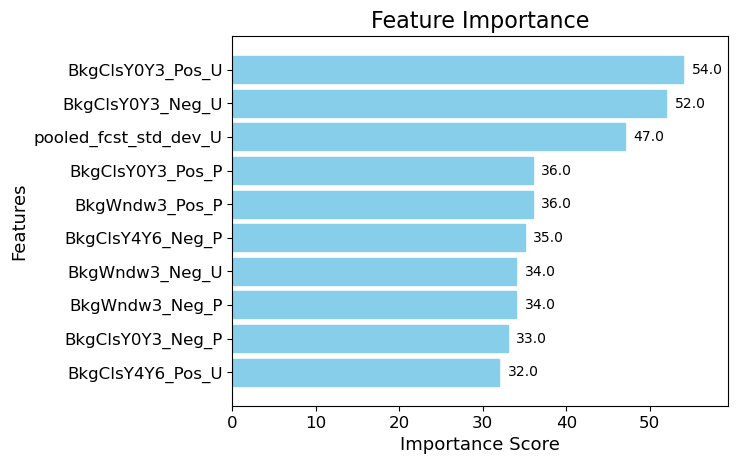

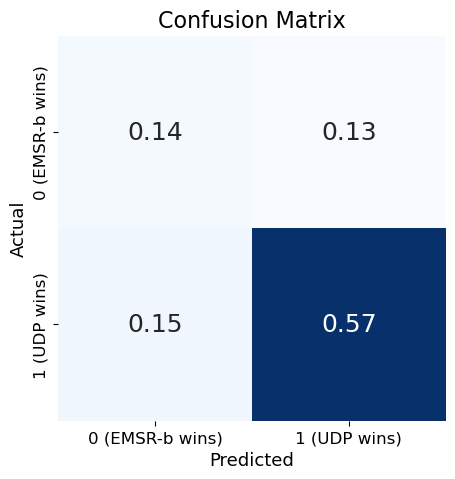

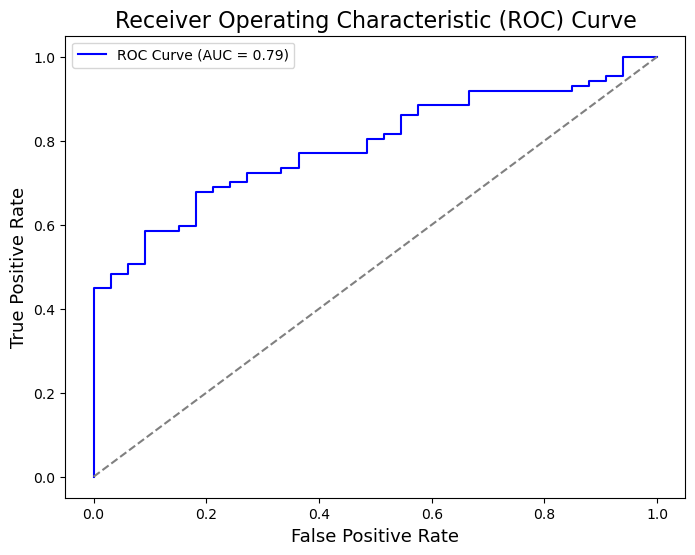

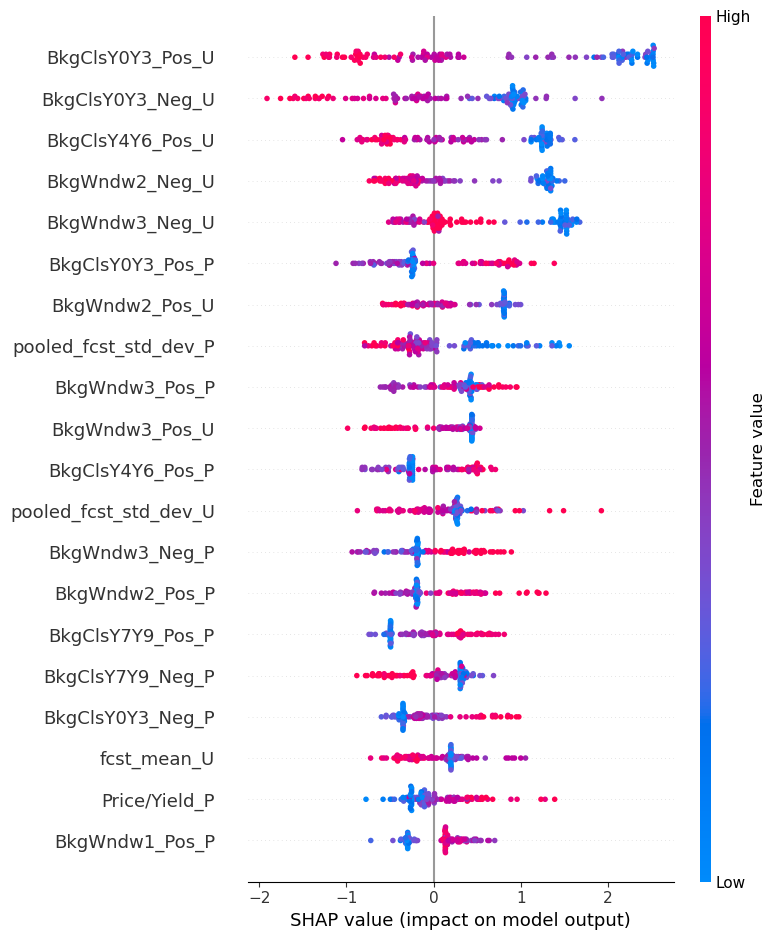

In [59]:
Helper.plot_model_evaluation(model, X_test, Y_test)

In [60]:
# implement logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.52      0.59        33
           1       0.83      0.91      0.87        87

    accuracy                           0.80       120
   macro avg       0.76      0.71      0.73       120
weighted avg       0.79      0.80      0.79       120



/Users/maitreyeetalnikar/miniconda3/envs/SKY/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': logistic_model.coef_[0]})
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
print(coefficients)


NameError: name 'features' is not defined